# Concept

[![Twitter Handle](https://img.shields.io/badge/Twitter-@gaohongnan-blue?style=social&logo=twitter)](https://twitter.com/gaohongnan)
[![LinkedIn Profile](https://img.shields.io/badge/@gaohongnan-blue?style=social&logo=linkedin)](https://linkedin.com/in/gao-hongnan)
[![GitHub Profile](https://img.shields.io/badge/GitHub-gao--hongnan-lightgrey?style=social&logo=github)](https://github.com/gao-hongnan)
![Tag](https://img.shields.io/badge/Tag-Array-orange)

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
from IPython.display import display
from typing import Generator, List, Union, Any
from rich.pretty import pprint
from array import array

import sys
from pathlib import Path

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.dsa.complexity.benchmark import time_complexity_analyzer
    from omnivault.utils.reproducibility.seed import seed_all
else:
    raise ImportError("Root directory not found.")

seed_all(42, False, False)

42

## Introduction

**[Arrays](https://en.wikipedia.org/wiki/Array_data_structure)** are one of the
simplest and most commonly used data structures in computer science. An array is
a
**[contiguous block of memory](https://en.wikipedia.org/wiki/Array_data_structure#Element_identifier_and_addressing_formulas)**
that holds multiple items of the same data type. Arrays can be used to store and
manipulate large collections of data, which makes them fundamental to
programming.

In an array, data is stored in **fixed-size slots**, each of which holds an
item. Each slot in an array has a unique
**[index](https://en.wikipedia.org/wiki/Array_data_structure#Element_identifier_and_addressing_formulas)**,
which is used to access the data. The indices in an array typically start from 0
and increment by 1 for each subsequent slot. This allows for
**[fast access to data](https://en.wikipedia.org/wiki/Array_data_structure#Efficiency)**
in any given slot, as the array's index directly maps to the memory location of
the data. However, because arrays are a
**[fixed size](https://en.wikipedia.org/wiki/Array_data_structure#Bounded_arrays_and_array_bounds_checking)**,
they can't grow or shrink dynamically as the data needs change.

Arrays are a foundational concept and are used to build other data structures.
Despite their simplicity, arrays are incredibly powerful and versatile, and a
deep understanding of how they work is key to being an effective programmer. For
more details about arrays, you can visit
[Wikipedia](https://en.wikipedia.org/wiki/Array_data_structure).

## Common Notations

```{list-table} Array Notations
:header-rows: 1
:name: array-notations

* - Term
  - Definition
  - Example
* - **Array**
  - A data structure that contains a group of elements. The elements are
    typically of the same data type, such as an integer or string.
  - `array = [1, 2, 3, 4, 5]`
* - **Index**
  - The position of an element in the array. Indexing typically starts from 0,
    meaning the first element is at index 0, the second element is at index 1,
    and so on.
  - Given `index=2`, then `array[index]` returns `3`.
* - **Subarray**
  - A contiguous segment of an array.
  - Given an array `[2, 3, 6, 1, 5, 4]`, `[3, 6, 1]` is a subarray while
    `[3, 1, 5]` is not.
* - **Subsequence**
  - A sequence that can be derived from the array by deleting some or no elements
    without changing the order of the remaining elements.
  - Given an array `[2, 3, 6, 1, 5, 4]`, `[3, 1, 5]` is a subsequence but
    `[3, 5, 1]` is not.
* - **Element**
  - An individual item in an array.
  - In the array `[2, 3, 6, 1, 5, 4]`, `2` is an element.
* - **Length**
  - The number of elements in an array.
  - The array `[2, 3, 6, 1, 5, 4]` has a length of `6`.
* - **Two Pointers**
  - A common technique that uses two pointers which move through the array to
    solve problems, often useful in finding pairs or subsequences.
  - Used in problems like [Two Sum](https://leetcode.com/problems/two-sum/) or
    [Reverse String](https://leetcode.com/problems/reverse-string/).
```

## Contiguous

-   **Contiguous Memory Allocation**: In most programming languages, when a list
    (or an array, which is a fixed-size list) is created, a contiguous block of
    memory is allocated. This contiguous allocation ensures that each element in
    the list can be accessed by computing its memory address based on the
    starting memory address of the list and the element's position (or index) in
    the list.

-   **Index-Based Access**: The position of each element in the list is
    determined by its index, a numerical representation starting from 0 (in
    zero-indexed languages like Python, C, and Java) or 1 (in one-indexed
    languages like Lua and MATLAB). The memory address of an element at index
    $n$ can be calculated using the formula:
    `Base Address + (n * Size of Element)`. This formula leverages the fact that
    elements are stored at evenly spaced intervals in memory.

-   **Relative Positioning**: The sequential storage implies that the memory
    location of an element is relative to its immediate neighbors. For example,
    in a list of integers (assuming each integer occupies 4 bytes and the list
    starts at memory address 100), the element at index 1 would be at memory
    address 104, index 2 at 108, and so on. This relative positioning enables
    efficient access and traversal operations, as moving to the next or previous
    element involves a consistent step in memory.

Understanding this memory model is crucial for appreciating how basic operations
on lists, like indexing and iterating, are performed and why they have the time
complexities they do. For instance, accessing any element in a list via its
index is an $\mathcal{O}(1)$ operation because it involves a direct calculation
to find the element's memory address, regardless of the list's size.

## Advantages of Arrays

### Efficient Access

Elements in an array are stored at
[contiguous memory locations](https://en.wikipedia.org/wiki/Array_data_structure#Element_identifier_and_addressing_formulas),
which allows for efficient access. If you know the index of the desired element,
you can retrieve it in constant time, denoted as
[$\mathcal{O}(1)$](https://en.wikipedia.org/wiki/Time_complexity#Constant_time).

This is possible because the memory address of the first element is known, and
the memory address of any other element can be calculated by adding the product
of the size of each element and the index of the element to the memory address
of the first element. In formula terms, if `a` is the base address of the array,
`i` is the index of the element you're looking for, and `s` is the size of each
element, the memory address of the `i`th element is `a + i*s`.

This operation is quick and is independent of the size of the array, which is
why accessing an element in an array by its index is a constant time
[$\left(\mathcal{O}(1)\right)$](https://en.wikipedia.org/wiki/Time_complexity#Constant_time)
operation.

In [2]:
@time_complexity_analyzer(data_type="array", repeat=10, plot=True)
def list_access(n: int, array) -> None:
    _ = array[n // 2]

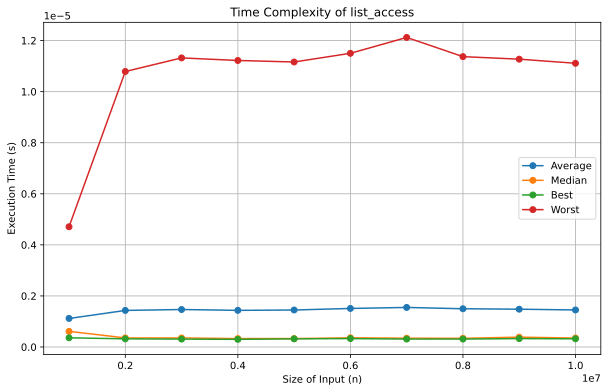

In [3]:
n_sizes = range(1000000, 10000001, 1000000) # 1M to 10M
_ = list_access(n_sizes)

### Data Cohesion

Arrays are excellent when you need to store multiple elements of the same type
together. This characteristic of arrays, known as
[data cohesion](<https://en.wikipedia.org/wiki/Cohesion_(computer_science)>),
helps in grouping similar type of data and improves code readability and
efficiency.

Data cohesion is an important concept in data structures and programming, as it
reduces complexity and increases the predictability of your code. Since every
element in an array is of the same type, you can be assured of the type of data
you're dealing with when you access or iterate over the elements in the array.
This reduces potential errors and improves the efficiency of operations you
perform on the array.

Moreover, because arrays store data in a contiguous block of memory, they also
increase [data locality](https://en.wikipedia.org/wiki/Locality_of_reference),
which can significantly improve performance for tasks that access the elements
sequentially, due to the way memory caching works.

Finally, this structure allows for efficient implementation of mathematical
vectors, matrices and other higher dimensional constructs, making arrays
fundamental to
[numerical computation](https://en.wikipedia.org/wiki/Numerical_analysis) and
data analysis tasks.

In [4]:
cohesion_array = array('i', [1, 2, 3, 4, 5])
pprint(cohesion_array)

array('i', [1, 2, 3, 4, 5])

In [5]:
cohesion_list: List[int] = [1, 2, 3, 4, 5]
pprint(cohesion_list)

[1, 2, 3, 4, 5]

Python's dynamic typing allows you to create lists (Python's version of arrays)
that contain elements of different types. While this can be flexible and
convenient for certain tasks, it comes with its own set of trade-offs.

In [6]:
uncohesion_list: List[Union[int, str]] = [1, 2, 3, 4, 5, "a", "b", "c"]
pprint(uncohesion_list)

[1, 2, 3, 4, 5, 'a', 'b', 'c']

### Ease of Iteration

Arrays can be easily traversed or iterated. This property, often termed as the
**ease of iteration**, allows for straightforward implementation of algorithms
like [sorting](https://en.wikipedia.org/wiki/Sorting_algorithm),
[searching](https://en.wikipedia.org/wiki/Search_algorithm), etc. Iterating over
an array is typically a
**[linear time operation](https://en.wikipedia.org/wiki/Time_complexity#Linear_time)**,
denoted as $\mathcal{O}(n)$, where `n` is the length of the array. This means
the time taken to iterate over an array increases linearly with the size of the
array.

In [7]:
@time_complexity_analyzer(data_type="array", repeat=10, plot=True)
def list_search(n: int, array) -> None:
    _ = n in array

@time_complexity_analyzer(data_type="array", repeat=10, plot=True)
def list_sort(n: int, array) -> None:
    _ = sorted(array)

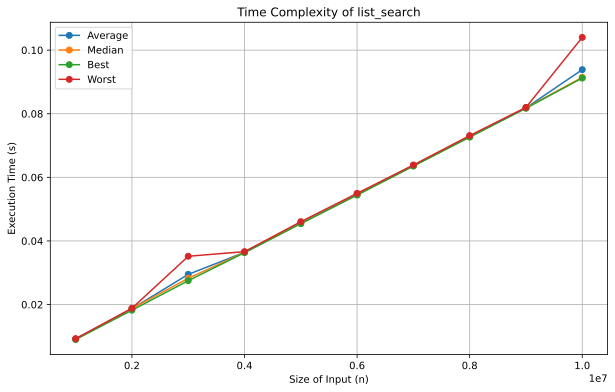

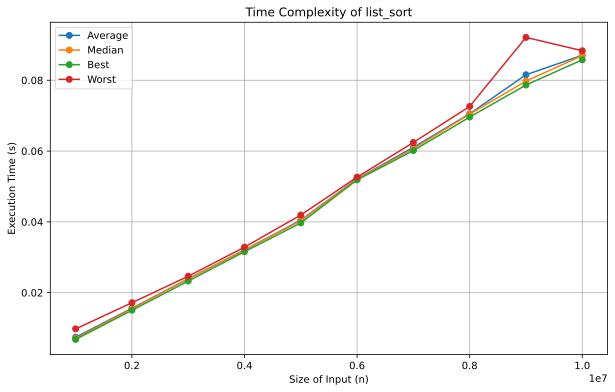

In [8]:
n_sizes = range(1000000, 10000001, 1000000) # 1M to 10M
_ = list_search(n_sizes)
_ = list_sort(n_sizes)

## Disadvantages of Arrays

### Size Limitation

One key limitation of arrays, particularly in some languages, is their fixed
size. Once an array is created, its size typically cannot be altered. If you
need to add more elements than the array can hold, you'd have to create a new,
larger array and copy all elements from the old to the new array, a process
known as
[array resizing](https://en.wikipedia.org/wiki/Dynamic_array#Geometric_expansion_and_amortized_cost).
This is a time-consuming operation, which takes $\mathcal{O}(n)$ time.

### Costly Insertions and Deletions

Inserting or removing elements from any position other than the end of the array
can be quite slow. This is because all subsequent elements need to be shifted to
fill the gap or make room for the new element. This process of
[array resizing](https://en.wikipedia.org/wiki/Dynamic_array#Geometric_expansion_and_amortized_cost)
takes $\mathcal{O}(n)$ time and can become increasingly inefficient as the size
of the array grows.

### Memory Wastage

Arrays can also lead to memory wastage. If the array is not fully utilized, the
unoccupied memory spaces are wasted. This is particularly true for fixed-size
arrays, where the size of the array is determined at the time of creation and
more memory may be allocated than necessary.

### No Special Operations

Unlike more complex data structures such as
[trees](<https://en.wikipedia.org/wiki/Tree_(data_structure)>) or
[graphs](<https://en.wikipedia.org/wiki/Graph_(abstract_data_type)>), arrays do
not offer special operations like insertion at a specific position, merging two
data structures, etc. This can limit their usefulness in certain scenarios,
making other data structures a more efficient choice.

### No Direct Support for Data Manipulation Functions

Arrays provide no direct methods for data manipulation such as sorting,
reversing, etc. Programmers need to implement these functions manually, which
can be prone to errors and might not be as efficient as those provided natively
by other data structures like
[lists in Python](https://docs.python.org/3/tutorial/datastructures.html) or
[vectors in C++](http://www.cplusplus.com/reference/vector/vector/).

## Complexity Analysis

### Time Complexity

Let's take a Python list named `array` for illustrative purposes.

```{list-table} Time Complexity of List Operations
:header-rows: 1
:name: list_time_complexity

* - Operation
  - Python Syntax
  - Best Case
  - Average Case
  - Worst Case
  - Description
* - Access
  - `array[i]`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - Accessing an element by its index in a list is a constant time operation.
* - Search (unsorted list)
  - `item in array`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - $\mathcal{O}(n)$
  - If the element is the first one in the list, it will be found immediately,
    hence best case is $\mathcal{O}(1)$. However, on average and in the worst
    case (element not present), all elements need to be examined.
* - Search (sorted list)
  - `binary_search(array, item)`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(\log{n})$
  - $\mathcal{O}(\log{n})$
  - Binary search on a sorted list is a logarithmic time operation if the item
    is in the list. If the item is the first one checked, best case is $\mathcal{O}(1)$.
* - Insert (at specific index)
  - `array.insert(i, item)`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - $\mathcal{O}(n)$
  - If we insert at the end of the list, best case is $\mathcal{O}(1)$.
    On average, and when inserting at the beginning, all subsequent elements
    need to be shifted, hence $\mathcal{O}(n)$.
* - Insert (at the end)
  - `array.append(item)`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - Appending an element at the end is a constant time operation as no shifting
    of elements is required.
* - Remove (specific item)
  - `array.remove(item)`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(n)$
  - $\mathcal{O}(n)$
  - If the element to be removed is the first one in the list, best case is
    $\mathcal{O}(1)$. However, on average and in the worst case, all elements
    may need to be shifted, hence $\mathcal{O}(n)$.
* - Remove (at the end)
  - `array.pop()`
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - $\mathcal{O}(1)$
  - Popping an element from the end is a constant time operation as no shifting
    of elements is required.
```

In [9]:
@time_complexity_analyzer(data_type="array", repeat=10, plot=True)
def list_append(n: int, array) -> None:
    array.append(n)


@time_complexity_analyzer(data_type="array", repeat=10, plot=True)
def list_insert(n: int, array) -> None:
    array.insert(0, n)


@time_complexity_analyzer(data_type="array", repeat=10, plot=True)
def list_pop(n: int, array) -> None:
    array.pop()

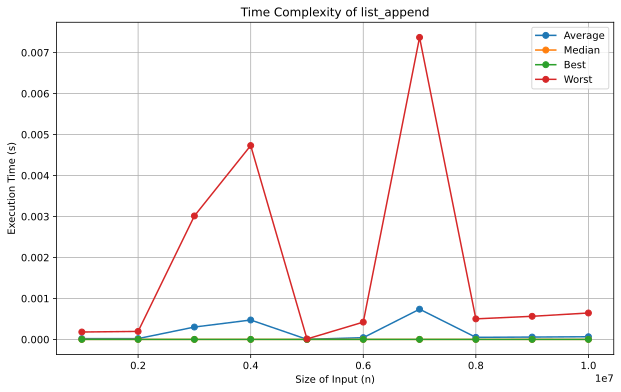

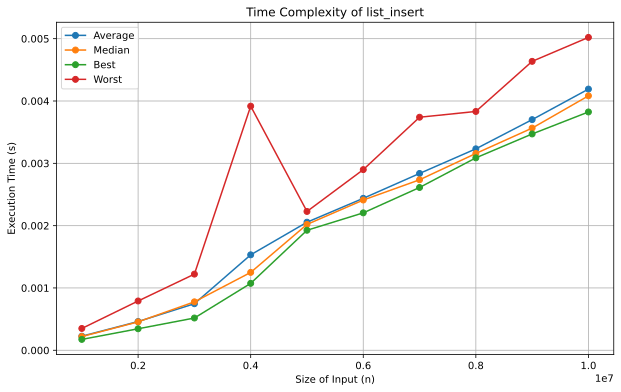

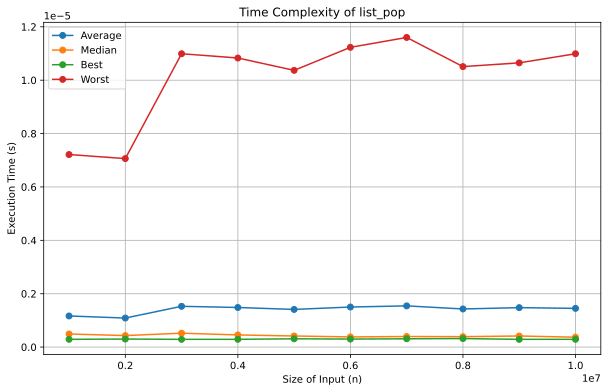

In [10]:
n_sizes = range(1000000, 10000001, 1000000) # 1M to 10M
_ = list_append(n_sizes)
_ = list_insert(n_sizes)
_ = list_pop(n_sizes)

### Space Complexity

Space complexity is a measure of the amount of memory an algorithm needs to run
to completion. It's important because memory is a finite resource, and if an
algorithm uses too much memory, it can cause the program to run slower or even
fail. Just like time complexity, space complexity is typically expressed using
Big-O notation.

Let's consider the space complexity of Python lists:

```{list-table} Space Complexity of List
:header-rows: 1
:name: list_space_complexity

* - Operation
  - Python Syntax
  - Big-O Notation
  - Description
* - Initializing
  - `array = [0] * n`
  - $\mathcal{O}(n)$
  - Initializing a list with `n` elements requires `n` units of space.
* - Inserting
  - `array.append(item)` or `array.insert(i, item)`
  - $\mathcal{O}(n)$
  - Inserting an element might require resizing the list, which involves
    creating a new list and copying all elements from the old list. In the worst
    case (when the list needs to be resized), this requires `n` units of space.
* - Slicing
  - `subarray = array[i:j]`
  - $\mathcal{O}(k)$
  - Creating a slice of `k` elements requires `k` units of space. Here,
    `k = j - i`.
```

In most cases, both time and space complexity are important considerations when
writing code. Sometimes, you can trade off between the two: you can sometimes
make your code run faster by using more memory (a technique sometimes called
space-time tradeoff), or you can make your code use less memory by accepting
that it will run slower. The right balance between time and space complexity
depends on the specific requirements of your program.

### Space-Time Tradeoff with Arrays

In computer science, the space-time tradeoff also applies when dealing with
arrays. Often, we can make our programs run faster by using more memory, or we
can save memory by accepting that our programs will run slower. This tradeoff is
a common theme in computer science and can be seen in different situations when
working with arrays.

Consider a scenario where you are performing multiple operations on an array.
One such operation could be sorting the array. If you're only sorting the array
once and then performing lookups, the time complexity of sorting the array once
(say using quicksort or mergesort which is O(n log n)) is not significant.
However, if you're repeatedly sorting the array and then performing operations
like binary search, the time spent in sorting could become significant.

In such cases, it may be worth it to sort the array once and then use additional
space to store the sorted array. This way, you wouldn't need to sort the array
every time you need to perform a binary search. By using additional space,
you've managed to decrease the time complexity of your program, exemplifying a
space-time tradeoff.

#### Example

```python
# Given an array of items
items = [5, 2, 9, 1, 5, 6]

# If we need to perform binary search multiple times, we might be tempted to
# sort the array each time
items.sort()
# Perform binary search...

# If we need to do it again, we might sort it again, which is unnecessary
items.sort()
# Perform binary search...

# A better way would be to sort once, and store the sorted array
sorted_items = sorted(items)

# Now, we can perform binary search on the sorted array, without needing to sort
# it each time
```

In this scenario, we've used additional space to store the sorted array, but
we've saved computational time because we no longer need to sort the array each
time we perform a binary search. This is a practical example of a space-time
tradeoff.

Please note that the specific decisions you make in terms of space-time tradeoff
can greatly depend on the specifics of the problem you're trying to solve, such
as the size of your data and the resources available to you.

## Common Clarifications and Corner Cases

```{list-table} Interview Tips for Array Problems
:header-rows: 1
:name: array_interview_tips

* - Tip
  - Clarify
  - Example
* - **Clarify the nature of values**
  - Clarify if there are duplicate values. Would duplicates
  affect the answer? Do they simplify or complicate the problem?
  - In Python: `array = [1, 2, 2, 3, 4]`
* - **Beware of out-of-bound indices**
  - Be careful not to go out of bounds when using indices.
  - Accessing `array[n]` or `array[-n-1]` in an array of
  length n results in `IndexError`.
* - **Avoid unnecessary slicing or concatenating**
  - Slicing or concatenating arrays takes $\mathcal{O}(n)$
  time. Use start and end indices where possible.
  - Instead of `array[1:4]`, use a loop for elements from
  index 1 to 3.
* - **Always consider corner cases**
  - Consider situations like empty sequence, sequence with
  1 or 2 elements, or with repeated elements.
  - Handle scenarios like an empty array (`[]`), an array
  with a single element (`[1]`), or with duplicates
  (`[1, 1, 2, 2, 2]`).
* - **Array Sorting**
  - Be mindful of time complexity when sorting. Improper
  sorting can change an $\mathcal{O}(n)$ problem into an
  $\mathcal{O}(n \log n)$ problem.
  - Sorting is an $\mathcal{O}(n \log n)$ operation. Python's
  `sorted(array)` should be used sparingly in performance-
  critical code.
* - **In-place operations**
  - Some problems may require in-place solutions, meaning
  that you should not allocate additional data structures.
  - If you need to reverse an array, use Python's
  `array.reverse()`, which modifies the array in-place.
* - **Multi-dimensional arrays**
  - Some problems may require working with 2D arrays or
  matrices. Understand how they are stored in memory and
  how to traverse them efficiently.
  - A 2D array or matrix can be accessed using two indices.
  `matrix[i][j]` gets the element in the i-th row and j-th
  column.
```

## References and Further Readings

-   [Tech Interview Handbook - Yang Shun](https://www.techinterviewhandbook.org/algorithms/array/)
-   [Array in Data Structure: What is, Arrays Operations - Guru99](https://www.guru99.com/array-data-structure.html)